<div style="text-align: center;">
  <h1>Cybersecurity Attacks</h1>
</div>

## Contexte
La cybersécurité est devenue un enjeu majeur dans un monde de plus en plus connecté.<br> 
Les incidents de cybersécurité peuvent avoir des impacts graves sur les entreprises, allant de la perte de données à des violations massives de confidentialité.<br>
Une compréhension approfondie des tendances temporelles des attaques et une capacité à prédire leur gravité (faible, moyenne, élevée) sont essentielles pour optimiser les stratégies de défense, renforcer la surveillance pendant les périodes à risque, et prioriser les réponses aux incidents critiques. 

## Source des Données
Ce dataset est disponible sur le dépôt GitHub : https://github.com/incribo-inc/cybersecurity_attacks.<br>  
Il recense divers incidents de cybersécurité en fournissant des informations détaillées sur le trafic réseau, les actions prises, et le contexte associé.<br> 
Les données concernent principalement des incidents observés en Inde, offrant ainsi un aperçu des vulnérabilités spécifiques à cette région.

## Description des Données
Le fichier contient 25 colonnes et un total de 40000 lignes. Ces données permettent de mieux comprendre les schémas des attaques, les segments vulnérables et les réponses associées.

### Variables Principales et Leur Signification
- **Timestamp** : Horodatage de l'événement, indiquant quand l'incident a eu lieu.
- **Source IP Address** et **Destination IP Address** : Adresses IP de la source et de la destination impliquées dans le trafic.
- **Source Port** et **Destination Port** : Ports réseau utilisés par la source et la destination.
- **Protocol** : Protocole de communication (ex : ICMP, UDP, TCP).
- **Packet Length** : Taille des paquets transmis, mesurée en octets.
- **Packet Type** : Type de paquet (données ou contrôle).
- **Traffic Type** : Type de trafic (HTTP, DNS, etc.).
- **Severity Level** : Niveau de gravité de l'incident (Low, Medium, High, etc.).
- **Geo-location Data** : Localisation géographique associée à l'incident.
- **Action Taken** : Action entreprise pour répondre à l'incident (ex : Bloqué, Ignoré, etc.).
- **User Information** et **Device Information** : Informations sur l'utilisateur et le périphérique impliqués.
- **Network Segment** : Segment réseau où l'incident a été enregistré.
- **IDS/IPS Alerts** : Alertes issues de systèmes de détection et de prévention des intrusions.

Le projet aborde les questions suivantes, structurées autour des deux objectifs principaux :
-**Analyse temporelle via clustering** : Regrouper les périodes similaires en fonction des schémas d’attaques pour identifier les moments à haut risque.
-**Prédiction de la gravité** : Développer un modèle de classification pour prédire le niveau de gravité des attaques en fonction des caractéristiques disponibles.


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Data Loading

In [4]:
path="../data/raw/cybersecurity_attacks.csv"
data= pd.read_csv(path)
data.head

<bound method NDFrame.head of                  Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     

## Data Exploration

----------------------

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

### Description du jeu de données

Ce dataset comprend **25 variables** réparties en :

#### Variables catégorielles (17) :
- `Timestamp` (format objet)
- `Source IP Address`
- `Destination IP Address` 
- `Protocol`
- `Packet Type`
- `Traffic Type`
- `Payload Data`
- `Malware Indicators` (50% de valeurs manquantes)
- `Alerts/Warnings` (~50% manquants)
- `Attack Type`
- `Attack Signature`
- `Action Taken`
- `Severity Level` 
- `User Information`
- `Device Information`
- `Network Segment`
- `Geo-location Data`
- `Proxy Information` (~50% manquants)
- `Firewall Logs` (~50% manquants)
- `IDS/IPS Alerts` (~50% manquants)
- `Log Source`

#### Variables numériques (4) :
- `Source Port` (int64)
- `Destination Port` (int64) 
- `Packet Length` (int64)
- `Anomaly Scores` (float64)
---

In [6]:
print("Missing data :")
data.isnull().sum().sort_values(ascending=False)

Missing data :


Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

## Data Preparation

+ Suppression de la colonne "Payload Data"et"User Information" :<br>
 Ces champs ne semblaient pas nécessaires pour l'analyse, donc on les a éliminé pour alléger le jeu de données et éviter les confusions.<br>
+ Remplacement des valeurs manquantes :<br>
. "Alerts/Warnings" → "Alert Not Triggered" (précise qu'aucune alerte n'a été déclenchée).<br>
. "Firewall Logs" → "No Data" (indique l'absence d'enregistrements).<br>
. "Proxy Information" → "No Data" (standardise les données manquantes).<br>
. "IDS/IPS Alerts" → "No Data" (évite les valeurs vides).<br>
. "Malware Indicators" → "Unknown" (indique une absence ou une incertitude sur les indicateurs de malware).<br>

In [7]:
cleaned_data = data.drop(["Payload Data", "User Information"], axis=1)
cleaned_data["Alerts/Warnings"] = cleaned_data["Alerts/Warnings"].fillna("Alert Not Triggered")
cleaned_data["Firewall Logs"] = cleaned_data["Firewall Logs"].fillna("No Data")
cleaned_data["Proxy Information"] = cleaned_data["Proxy Information"].fillna("No Data")
cleaned_data["IDS/IPS Alerts"] = cleaned_data["IDS/IPS Alerts"].fillna("No Data")
cleaned_data["Malware Indicators"] = cleaned_data["Malware Indicators"].fillna("Unknown")
cleaned_data.isnull().sum().sort_values(ascending=False)


Timestamp                 0
Attack Type               0
IDS/IPS Alerts            0
Firewall Logs             0
Proxy Information         0
Geo-location Data         0
Network Segment           0
Device Information        0
Severity Level            0
Action Taken              0
Attack Signature          0
Alerts/Warnings           0
Source IP Address         0
Anomaly Scores            0
Malware Indicators        0
Traffic Type              0
Packet Type               0
Packet Length             0
Protocol                  0
Destination Port          0
Source Port               0
Destination IP Address    0
Log Source                0
dtype: int64

In [8]:
cleaned_data['Browser'] = cleaned_data['Device Information'].str.split('/').str[0]


In [9]:

platform = r'(Windows|Linux|Android|iPad|iPod|iPhone|Macintosh)'
cleaned_data['Platform'] = cleaned_data['Device Information'].str.extract(platform, flags=re.I).fillna('Unknown')
cleaned_data = cleaned_data.drop('Device Information', axis = 1)

In [10]:
# Extract time features
cleaned_data["Timestamp"] = pd.to_datetime(cleaned_data["Timestamp"], errors='coerce')
cleaned_data['Year'] = cleaned_data["Timestamp"].dt.year
cleaned_data['Month'] = cleaned_data["Timestamp"].dt.month
cleaned_data['Day'] = cleaned_data["Timestamp"].dt.day
cleaned_data['Hour'] = cleaned_data["Timestamp"].dt.hour
cleaned_data['Minute'] = cleaned_data["Timestamp"].dt.minute
cleaned_data['DayOfWeek'] = cleaned_data["Timestamp"].dt.dayofweek
cleaned_data['Hour_Bin'] = pd.cut(cleaned_data['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
print(cleaned_data['Hour_Bin'].value_counts())

Hour_Bin
Afternoon    10130
Night         9964
Morning       9870
Evening       8331
Name: count, dtype: int64


In [12]:
variables = [
    'Protocol', 'Packet Type', 'Traffic Type', 
    'Malware Indicators', 'Log Source', 'Browser', 
    'Platform', 'Year'
]

print("*"*50)


for var in variables:
    if var in cleaned_data.columns:
        print(f"\n--- {var} ---")
        
        # Cas spécial pour l'année
        if var == 'Year':
            print(f"Plage : {cleaned_data['Year'].min()} à {cleaned_data['Year'].max()}")
        else:
            # Affiche les 10 valeurs les plus fréquentes
            print(cleaned_data[var].value_counts().head(10))
   

**************************************************

--- Protocol ---
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

--- Packet Type ---
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64

--- Traffic Type ---
Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

--- Malware Indicators ---
Malware Indicators
IoC Detected    20000
Unknown         20000
Name: count, dtype: int64

--- Log Source ---
Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64

--- Browser ---
Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64

--- Platform ---
Platform
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64

--- Year ---
Plage : 2020 à 2023


In [13]:
new_path="../data/processed/processed_cybersecurity_attacks.csv"
cleaned_data.to_csv(new_path)

---

###  Encodage des variables catégorielles avec OneHotEncoder

Dans cette étape, nous avons appliqué un **encodage One-Hot** aux variables catégorielles du jeu de données.  
L'objectif de cette opération est de convertir les **données non numériques** (comme les protocoles ou les types d'attaques) en un format numérique exploitable par les algorithmes d'analyse tels que le clustering ou la détection d'anomalies.

Nous avons sélectionné les colonnes suivantes pour l'encodage :

- `Protocol`
- `Traffic Type`
- `Severity Level`
- `Action Taken`
- `Packet Type`
- `Network Segment`
- `Platform`
- `Attack Type`
- `Browser`

Ces variables ont été choisies car :
- Elles possèdent un **nombre raisonnable de catégories uniques** (faible cardinalité),
- Elles sont **pertinentes** pour l'analyse comportementale des attaques et des événements réseau,
- Elles ne sont **ni ordinales** (pas d’ordre logique entre les valeurs),
- Elles peuvent avoir une influence sur la **segmentation des attaques** ou la **détection d’anomalies**.


In [14]:
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv(new_path)

# Colonnes à encoder
cols_to_encode = ['Protocol', 'Traffic Type', 'Severity Level', 'Action Taken', 'Packet Type', 'Network Segment','Platform', 'Attack Type', 'Browser']

# Appliquer le OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[cols_to_encode])

# Créer un DataFrame encodé
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols_to_encode))

# Concaténer avec le dataset d'origine sans les anciennes colonnes
df_encoded = pd.concat([df.drop(columns=cols_to_encode), encoded_df], axis=1)

encoded="../data/processed/encoded_cybersecurity_attacks.csv"
df_encoded.to_csv(encoded)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11404\1547767226.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(encoded_counts.values()), y=list(encoded_counts.keys()), palette='viridis')


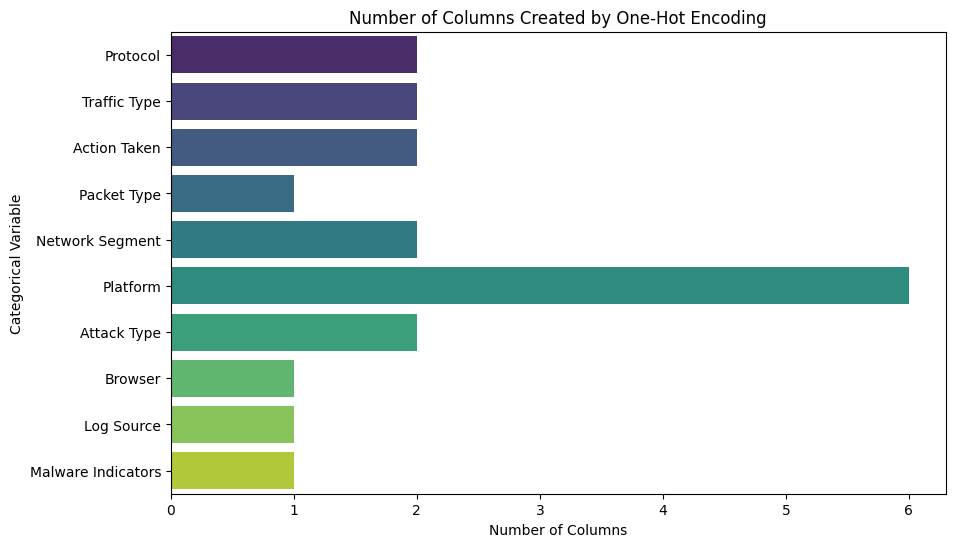

In [15]:
# Liste des colonnes encodées
cols_to_encode = ['Protocol', 'Traffic Type', 'Action Taken', 'Packet Type', 
                  'Network Segment', 'Platform', 'Attack Type', 'Browser', 
                  'Log Source', 'Malware Indicators']
df = pd.read_csv("../data/processed/processed_cybersecurity_attacks.csv")

# Compter le nombre de catégories après regroupement des rares
encoded_counts = {}
threshold = 0.01
for col in cols_to_encode:
    freq = df[col].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index
    df[col] = df[col].replace(rare_categories, 'Other')
    encoded_counts[col] = df[col].nunique() - 1  # Moins 1 pour drop='first'

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(encoded_counts.values()), y=list(encoded_counts.keys()), palette='viridis')
plt.title('Number of Columns Created by One-Hot Encoding')
plt.xlabel('Number of Columns')
plt.ylabel('Categorical Variable')
plt.savefig('../results/figures/one_hot_dimension.png', dpi=300, bbox_inches='tight')
plt.show()

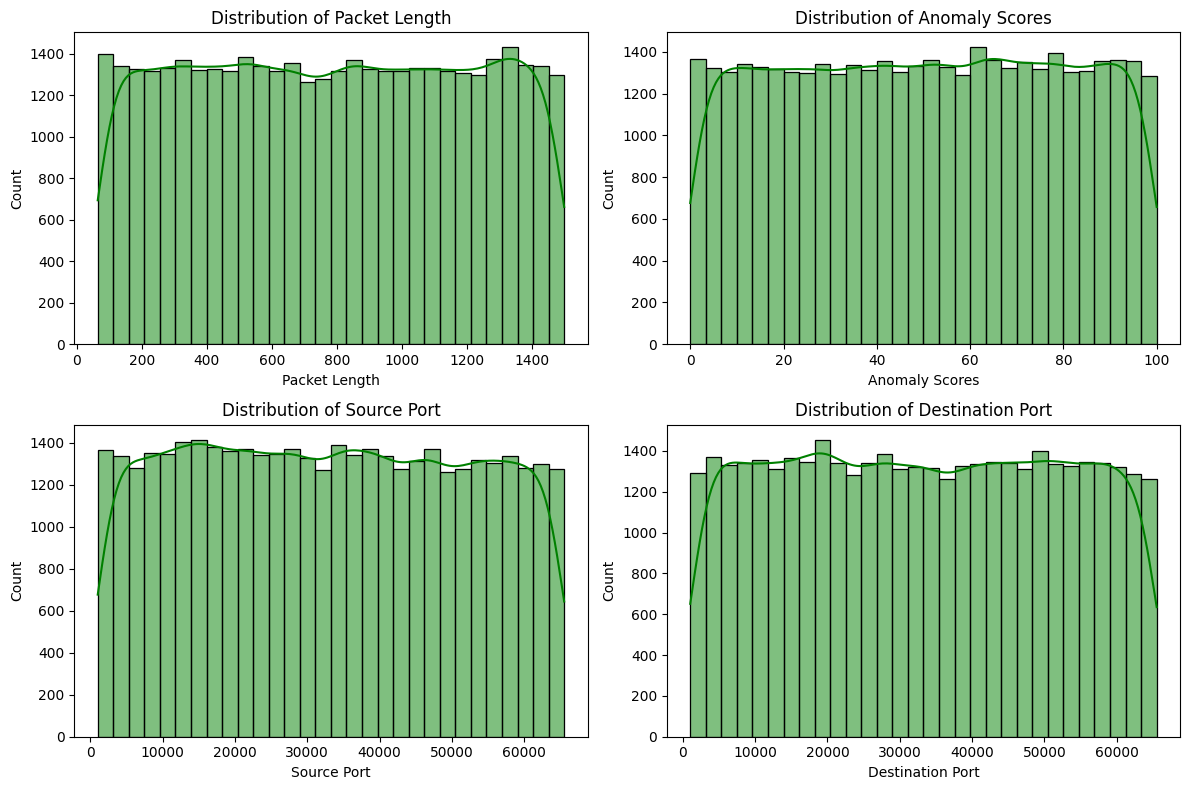

In [16]:
numeric_cols = ['Packet Length', 'Anomaly Scores', 'Source Port', 'Destination Port']

# Histogrammes avec densité
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_encoded, x=col, kde=True, color='green', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../results/figures/numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11404\2864866123.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incident_counts = cleaned_data.groupby(['Hour_Bin', 'Severity Level']).size().reset_index(name='Count')


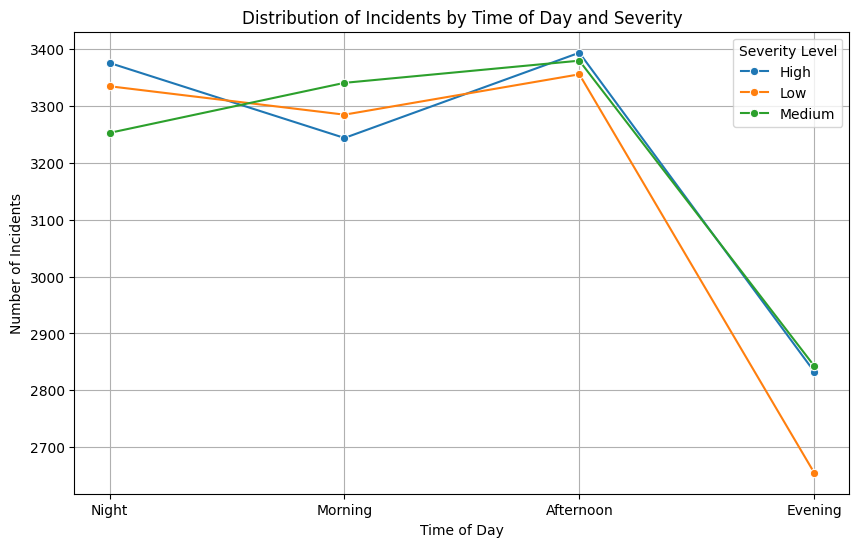

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


incident_counts = cleaned_data.groupby(['Hour_Bin', 'Severity Level']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.lineplot(data=incident_counts, x='Hour_Bin', y='Count', hue='Severity Level', marker='o')


plt.title('Distribution of Incidents by Time of Day and Severity')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.grid(True)


plt.savefig('../results/figures/incidents_by_hour_bin.png', dpi=300, bbox_inches='tight')
plt.show()

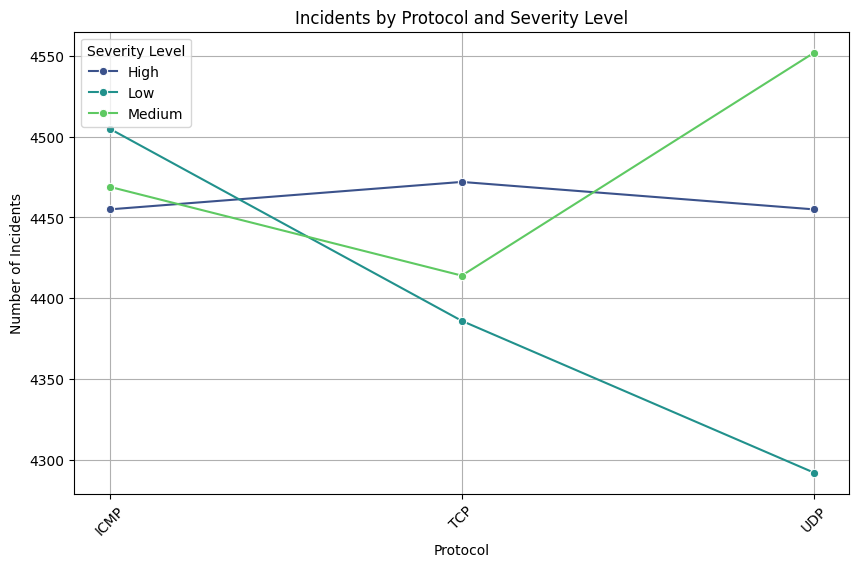

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


protocol_severity = pd.crosstab(df['Protocol'], df['Severity Level'])


protocol_severity = protocol_severity.reset_index()


protocol_severity_melted = protocol_severity.melt(id_vars='Protocol', 
                                                  value_vars=protocol_severity.columns[1:], 
                                                  var_name='Severity Level', 
                                                  value_name='Count')


plt.figure(figsize=(10, 6))
sns.lineplot(data=protocol_severity_melted, x='Protocol', y='Count', hue='Severity Level', 
             marker='o', palette='viridis')


plt.title('Incidents by Protocol and Severity Level')
plt.xlabel('Protocol')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend(title='Severity Level')


plt.savefig('../results/figures/incidents_by_protocol.png', dpi=300, bbox_inches='tight')
plt.show()

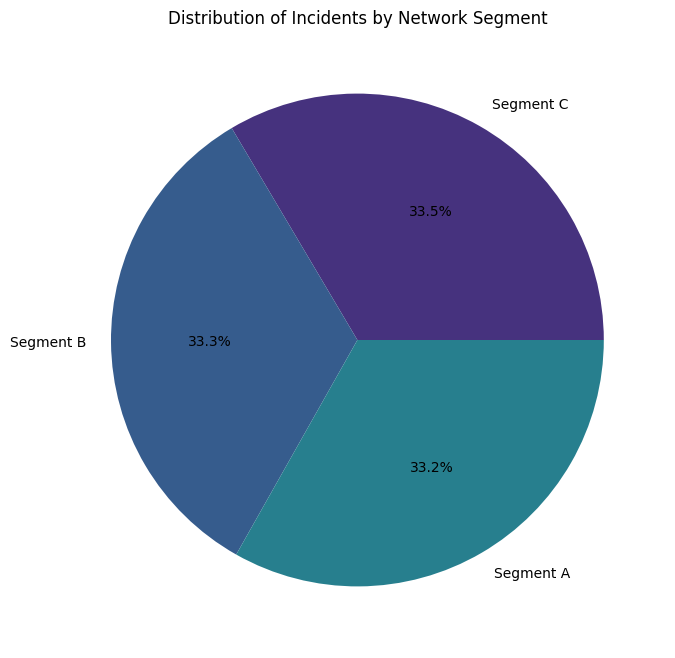

In [20]:
# Répartition des incidents par segment réseau
segment_counts = df['Network Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Incidents by Network Segment')
plt.savefig('../results/figures/incidents_by_network_segment.png', dpi=300, bbox_inches='tight')
plt.show()

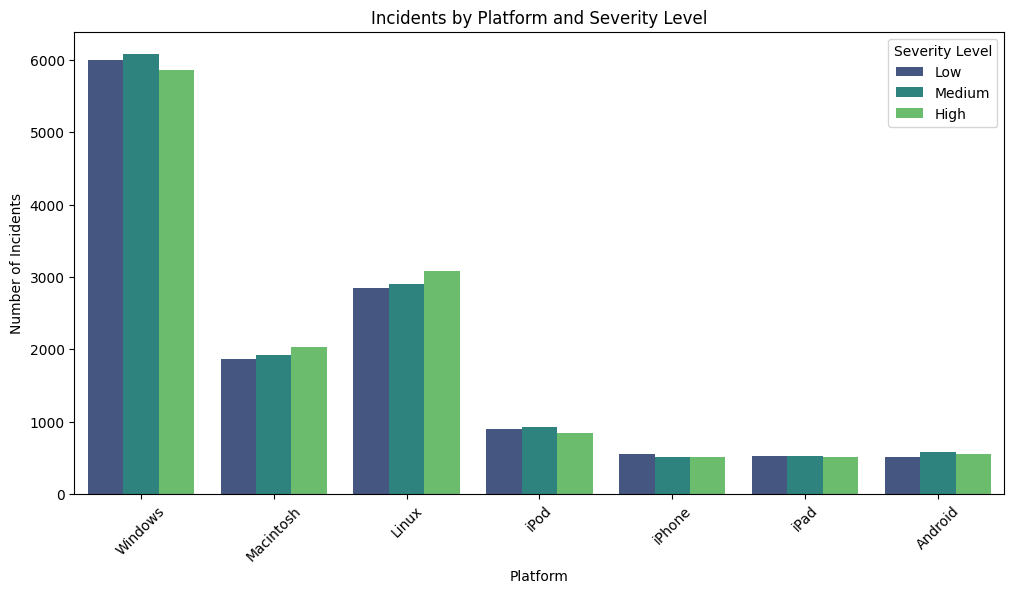

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Platform', hue='Severity Level', palette='viridis')
plt.title('Incidents by Platform and Severity Level')
plt.xlabel('Platform')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.savefig('../results/figures/incidents_by_platform.png', dpi=300, bbox_inches='tight')
plt.show()

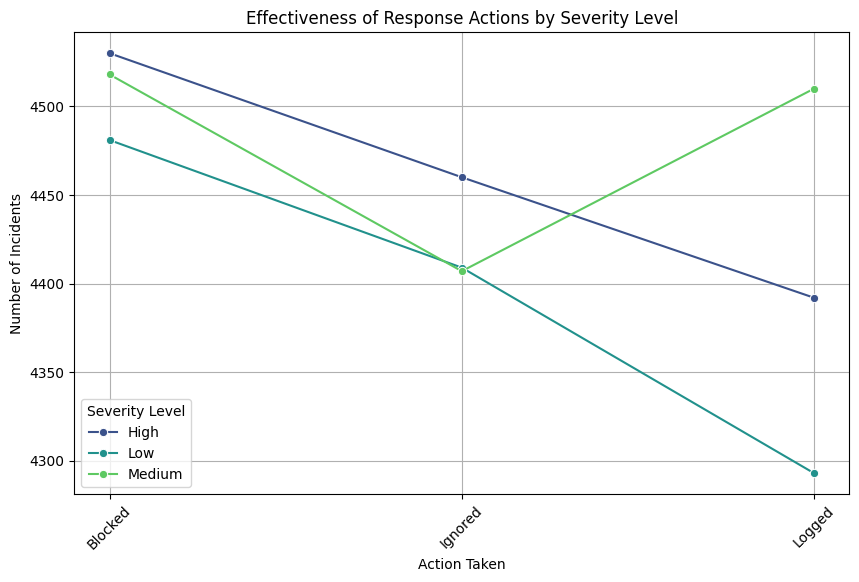

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


action_severity = pd.crosstab(df['Action Taken'], df['Severity Level'])


action_severity = action_severity.reset_index()


action_severity_melted = action_severity.melt(id_vars='Action Taken', 
                                              value_vars=action_severity.columns[1:], 
                                              var_name='Severity Level', 
                                              value_name='Count')


plt.figure(figsize=(10, 6))
sns.lineplot(data=action_severity_melted, x='Action Taken', y='Count', hue='Severity Level', 
             marker='o', palette='viridis')


plt.title('Effectiveness of Response Actions by Severity Level')
plt.xlabel('Action Taken')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend(title='Severity Level')


plt.savefig('../results/figures/effectiveness_by_action.png', dpi=300, bbox_inches='tight')
plt.show()

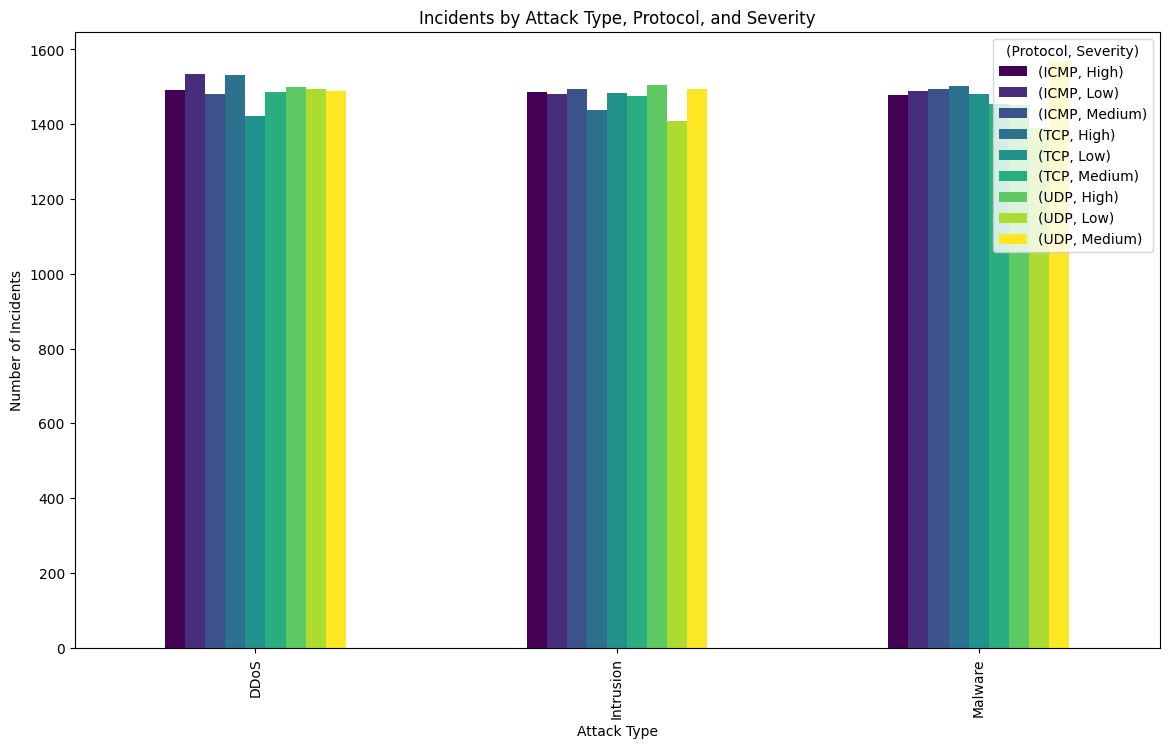

In [23]:
# Tableau croisé
attack_protocol = pd.crosstab(df['Attack Type'], [df['Protocol'], df['Severity Level']])

# Bar plot
attack_protocol.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Incidents by Attack Type, Protocol, and Severity')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.legend(title='(Protocol, Severity)')
#plt.savefig('../results/figures/incidents_by_attack_protocol.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


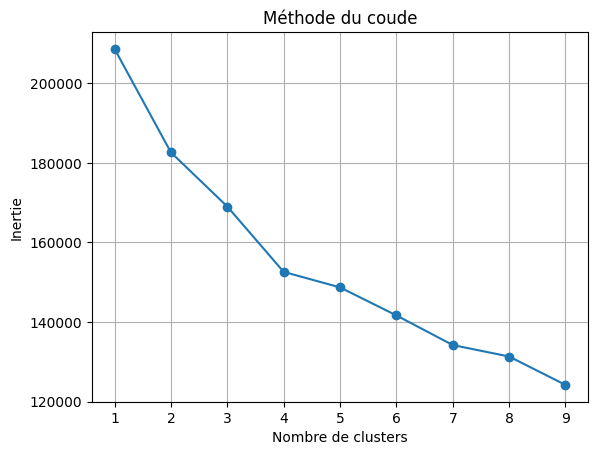

In [24]:
grouped = df.groupby(["Year", "Month", "Day", "Hour"]).agg({
    "Attack Type": 'value_counts',
    "Protocol": 'value_counts',
    "Severity Level": 'value_counts'
}).unstack(fill_value=0)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = grouped.drop(columns=["Year", "Month", "Day", "Hour"])
X_filled = X.fillna(0)
X_scaled = scaler.fit_transform(X_filled)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
grouped["Cluster"] = kmeans.fit_predict(X_scaled)


         Attack Type_DDoS  Attack Type_High  Attack Type_ICMP  \
Cluster                                                         
0                1.145839               0.0               0.0   
1                0.567384               0.0               0.0   
2                0.383669               0.0               0.0   
3                0.460494               0.0               0.0   

         Attack Type_Intrusion  Attack Type_Low  Attack Type_Malware  \
Cluster                                                                
0                     1.102221              0.0             1.134332   
1                     0.407705              0.0             0.425499   
2                     0.602645              0.0             0.424881   
3                     0.400000              0.0             0.548611   

         Attack Type_Medium  Attack Type_TCP  Attack Type_UDP  Protocol_DDoS  \
Cluster                                                                        
0               

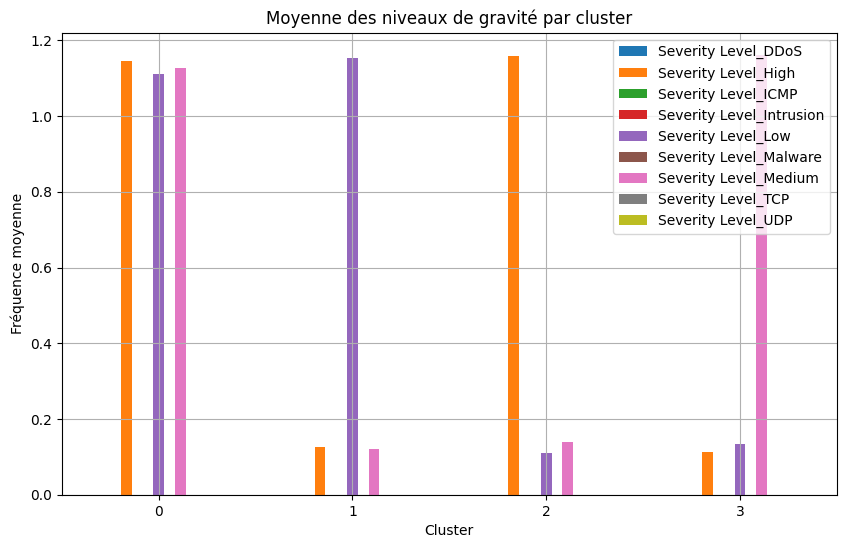

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Réappliquer le clustering sur les données standardisées
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
grouped['Cluster'] = kmeans.fit_predict(X_scaled)

# Ajouter l’étiquette de cluster aux données originales (non standardisées mais remplies)
X_filled['Cluster'] = grouped['Cluster']

# Calculer les moyennes par cluster
cluster_stats = X_filled.groupby("Cluster").mean()

# Afficher les résultats
print(cluster_stats)


# Extraire uniquement les colonnes des niveaux de sévérité
severity_columns = [col for col in X_filled.columns if "Severity Level" in col]
severity_stats = X_filled.groupby("Cluster")[severity_columns].mean()

# Affichage
severity_stats.plot(kind="bar", figsize=(10, 6))
plt.title("Moyenne des niveaux de gravité par cluster")
plt.xlabel("Cluster")
plt.ylabel("Fréquence moyenne")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [26]:

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 🔹 Étape 1 : reconstruire la variable cible
def severity_label(row):
    if row['Severity Level_High'] == 1:
        return 'High'
    elif row['Severity Level_Medium'] == 1:
        return 'Medium'
    else:
        return 'Low'

X_filled['Severity'] = X_filled.apply(severity_label, axis=1)

# 🔹 Étape 2 : Préparer X et y
X = X_filled.drop(['Severity Level_High', 'Severity Level_Low', 'Severity Level_Medium', 'Severity'], axis=1)
y = X_filled['Severity']

# 🔹 Étape 3 : Encodage de la cible
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 🔹 Étape 4 : Définir les modèles
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='rbf', random_state=42)

# 🔹 Étape 5 : Validation croisée (CV=4)
rf_preds = cross_val_predict(rf_model, X, y_encoded, cv=4)
svm_preds = cross_val_predict(svm_model, X, y_encoded, cv=4)

# 🔹 Étape 6 : Rapports et matrices
print("Random Forest\n", classification_report(y_encoded, rf_preds, target_names=label_encoder.classes_))
print("SVM\n", classification_report(y_encoded, svm_preds, target_names=label_encoder.classes_))

print("Matrice RF:\n", confusion_matrix(y_encoded, rf_preds))
print("Matrice SVM:\n", confusion_matrix(y_encoded, svm_preds))


Random Forest
               precision    recall  f1-score   support

        High       0.73      0.90      0.81      8876
         Low       0.92      0.68      0.78      7809
      Medium       0.80      0.80      0.80      6498

    accuracy                           0.80     23183
   macro avg       0.82      0.79      0.80     23183
weighted avg       0.81      0.80      0.80     23183

SVM
               precision    recall  f1-score   support

        High       0.67      0.96      0.79      8876
         Low       0.94      0.61      0.74      7809
      Medium       0.89      0.72      0.80      6498

    accuracy                           0.78     23183
   macro avg       0.83      0.77      0.78     23183
weighted avg       0.82      0.78      0.77     23183

Matrice RF:
 [[7979  298  599]
 [1779 5325  705]
 [1151  154 5193]]
Matrice SVM:
 [[8555  149  172]
 [2638 4752  419]
 [1644  148 4706]]
